# Plotting in Python: matplotlib.pyplot

# Week 2 FIGURE BASICS

__General notes__

In [105]:
print('Initialize mpl & pyplot')
%matplotlib inline      
print('Use line magic (%matplotlib inline), to plot into frontend (eg Jupyter)')
import matplotlib.pyplot as plt
print('Import plt, and, if you want to dabble with the backend, also mpl')
import matplotlib as mpl
print(mpl.get_backend()) # check backend used 


Initialize mpl & pyplot
Use line magic (%matplotlib inline), to plot into frontend (eg Jupyter)
Import plt, and, if you want to dabble with the backend, also mpl
module://matplotlib_inline.backend_inline


Basic plots can be created implicitly by sys or explicitly by user
Explicit calls: create fig (fig = plt.figure()), specify axes (eg ax = plt.gca()), add subplots if req, plot/manipulate axes
Implicit calls go into plt and are associated with the currently active axes
Data can be saved using fig.savefig()


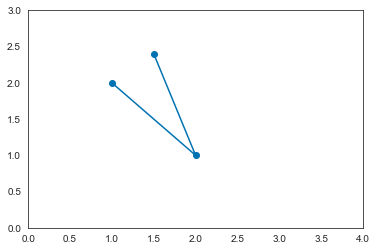

To list the components of an axis: ax.get_children()


 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [106]:
print('Basic plots can be created implicitly by sys or explicitly by user')
print('Explicit calls: create fig (fig = plt.figure()), specify axes (eg ax = plt.gca()), add subplots if req, plot/manipulate axes')
print('Implicit calls go into plt and are associated with the currently active axes')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,2, 1.5],[2,1, 2.4], 'o-')
ax.axis([0,4,0,3])
print('Data can be saved using fig.savefig()')
# fig.savefig('temp.png', dpi=fig.dpi)
plt.show(fig)

print('To list the components of an axis: ax.get_children()')
ax.get_children()

The lazy way is to go through the SCRIPTING layer: in this case, Python uses current fig & axes.
The explicit calls to get the current fig & axes can be obtained with gcf & gca
Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


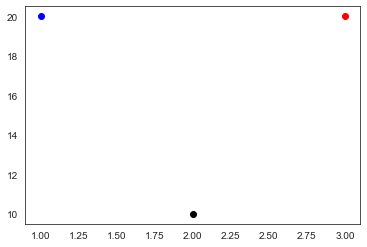

In [107]:
print('The lazy way is to go through the SCRIPTING layer: in this case, Python uses current fig & axes.')
plt.figure()
plt.plot(3,20,'ro')
plt.plot(1,20,'bo')
plt.plot(2,10,'ko')

print('The explicit calls to get the current fig & axes can be obtained with gcf & gca')
fig = plt.gcf()
print(fig)
ax = plt.gca()
print(ax)

SUBPLOTS are similar as in Matlab. They can be added by calling plt.subplot.


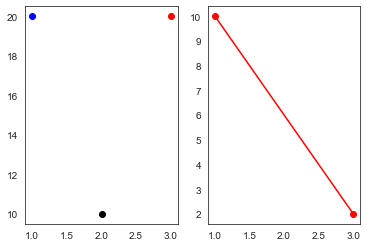

A more sophisticated approach is to define all axes beforehand. Note that the axis are locked in this example. Note also that here, the call to plot data in one subplot is not plt.plot but ax3.plot
To force a figure redraw, use plt.gcf().canvas.draw(). Note that it is possible to manually go through all axes and change x/ylabels


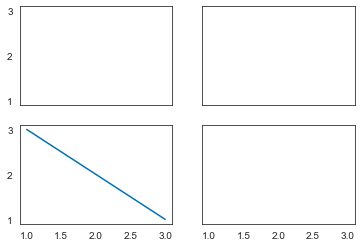

In [108]:
print('SUBPLOTS are similar as in Matlab. They can be added by calling plt.subplot.')
plt.subplot(121)
plt.plot(3,20,'ro')
plt.plot(1,20,'bo')
plt.plot(2,10,'ko')

plt.subplot(122)
plt.plot([3,1],[2,10],'r-o')
plt.show()

print('A more sophisticated approach is to define all axes beforehand. Note that the axis are locked in this example. Note also that here, the call to plot data in one subplot is not plt.plot but ax3.plot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True)
ax3.plot([1,2,3], [3,2,1])

print('To force a figure redraw, use plt.gcf().canvas.draw(). Note that it is possible to manually go through all axes and change x/ylabels')
#for ax in plt.gcf().get_axes():
#    for label in ax.get_xticklabels() + ax.get_yticklabels():
#        label.set_visible(True)


In [109]:
print('PACKING / UNPACKING DATA: ZIP fx =================')
print('Zip creates a list with paired values (tupel)')
zipGen = zip(range(1,11), range(5,15))
print(list(zipGen))

print('Zip also unpacks tupel into separate scores that are matched by position: x, y = zip(*zipGen)')
zipGen = zip(range(1,11), range(5,15)) # I have NO CLUE why this function has to be called again (else, error)
a,b = zip(*zipGen)
print(a)
print(b)

PACKING / UNPACKING DATA: ZIP fx =================
Zip creates a list with paired values (tupel)
[(1, 5), (2, 6), (3, 7), (4, 8), (5, 9), (6, 10), (7, 11), (8, 12), (9, 13), (10, 14)]
Zip also unpacks tupel into separate scores that are matched by position: x, y = zip(*zipGen)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
(5, 6, 7, 8, 9, 10, 11, 12, 13, 14)


-----------------------------------------------
__SCATTERPLOTS__

Use list arithmetic to paint half of the dots in blue, half red


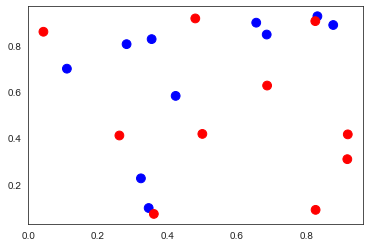

In [110]:
import numpy as np
print('Use list arithmetic to paint half of the dots in blue, half red')

a = np.random.rand(20,2)
plt.figure()
#plt.scatter(a[:,0], a[:,1])
color = ['blue'] * round(len(a)/2) # 10 blue dots
color.extend(['red'] * round(len(a)/2)) # 10 red dots
plt.scatter(a[:,0], a[:,1], c=color, s=77)

Simpler, more intuitive way to control colors /size: plot in multiple passes into same axes


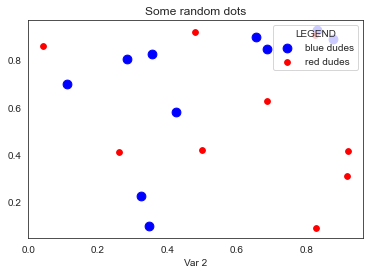

In [111]:
print('Simpler, more intuitive way to control colors /size: plot in multiple passes into same axes')
plt.figure()
plt.scatter(a[:int(len(a)/2),0], a[:int(len(a)/2),1], c='blue', s=77, label='blue dudes')
plt.scatter(a[int(len(a)/2+1):,0], a[int(len(a)/2+1):,1], c='red', s=33, label='red dudes')
plt.xlabel('Var 1')
plt.xlabel('Var 2')
plt.title('Some random dots')
plt.legend(loc=1, frameon=True, title='LEGEND') # note that the locations are odd - starts at 1h30, moves left to 10h30 then down to 7h30 and finally 4h30  

---------------------
__LINE Plots__

Linear and quadratic function and the difference (shading) between the two


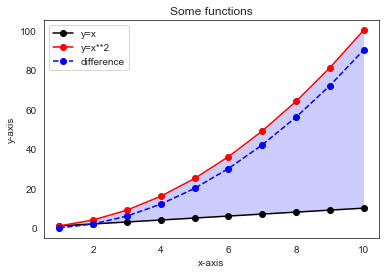

Dates can be used for the x-axis
By getting a handle of the current axis, it is possible to customize properties, eg orientation of the labels


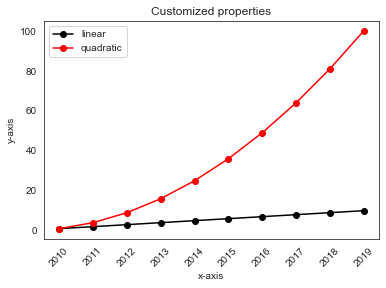

In [112]:
import pandas as pd
print('Linear and quadratic function and the difference (shading) between the two')
x = np.array(range(1,11))
y1 = x
y2 = x**2
y3 = y2-y1

fig = plt.figure()
plt.plot(x, y1, 'ko-', x, y2, 'ro-')
plt.plot(x, y3, 'bo--')
plt.title('Some functions')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(['y=x', 'y=x**2', 'difference'])

plt.gca().fill_between(x, y1, y2, 
                       facecolor = 'blue', alpha = .2)
plt.show()

fig = plt.figure()
print('Dates can be used for the x-axis')
xD = np.arange('2010', '2020',1, dtype='datetime64[Y]')
XD = list(map(pd.to_datetime, xD))
plt.plot(xD, y1, 'ko-', xD, y2, 'ro-')

print('By getting a handle of the current axis, it is possible to customize properties, eg orientation of the labels')
ax = plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(45)
    
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Customized properties')
ax.legend(['linear', 'quadratic'])

-------------------
__BAR charts__

Bar graphs are a bit awkward to use - the user will have to manually define the locations where new bars will appear in an existing chart. On the other hand, the builtin option to include error bars is convenient


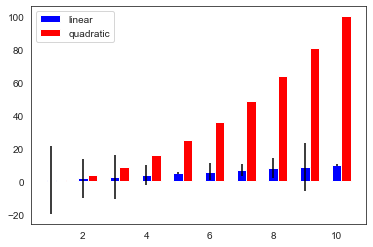

STACKED PLOTS: plot twice into the same plot, but the 2nd time use the BOTTOM argument (and pass the previous bar data, to which the new bar is added)


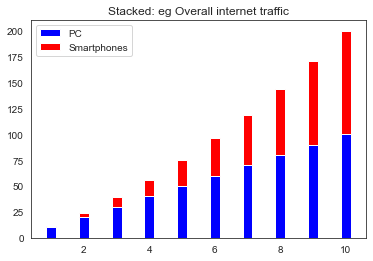

Same data, but pivoted (using barH). Note that now the width & bottom arguments have been replaced with height & left


Text(0.5, 1.0, 'Stacked: eg Overall internet traffic')

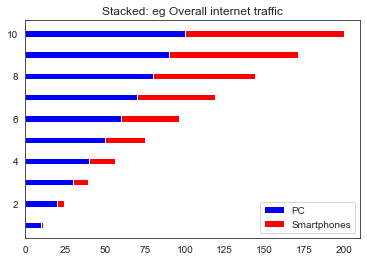

In [113]:
print('Bar graphs are a bit awkward to use - the user will have to manually define the locations where new bars will appear in an existing chart. On the other hand, the builtin option to include error bars is convenient')
x = np.array(range(1,11))
y1 = x
width=.3
fig = plt.figure()
plt.bar(x,y1, width = width, color='blue')

y2 = x**2
plt.bar(x+width,y2, width = width, color='red')

# randomly sample errorbar lengths - note that they will be added to the data values by the bar routine
lerr = [np.abs(np.random.normal(0,10)) for item in y1] 
plt.bar(x,y1, width = width, yerr=lerr, color='blue')
plt.legend(['linear', 'quadratic'])
plt.show()

print('STACKED PLOTS: plot twice into the same plot, but the 2nd time use the BOTTOM argument (and pass the previous bar data, to which the new bar is added)')
fig = plt.figure()
plt.bar(x,y1*10, width = .3, color='blue')
plt.bar(x,y2, width = .3, bottom=y1*10, color='red')
plt.legend(['PC', 'Smartphones'])
plt.title('Stacked: eg Overall internet traffic')
plt.show()

print('Same data, but pivoted (using barH). Note that now the width & bottom arguments have been replaced with height & left')
fig = plt.figure()
plt.barh(x,y1*10, height = .3, color='blue')
plt.barh(x,y2, height = .3, left = y1*10, color='red')
plt.legend(['PC', 'Smartphones'])
plt.title('Stacked: eg Overall internet traffic')


__TWEAKS: De-Junkifying (a bar graph)__

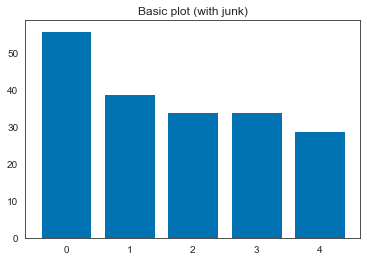

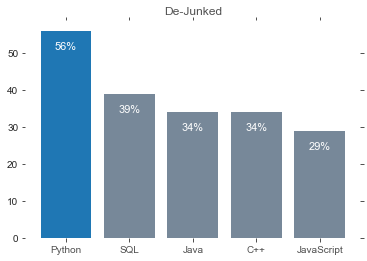

In [114]:
languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.figure()
bars = plt.bar(pos, popularity)
plt.title('Basic plot (with junk)')
plt.show()

plt.figure()
# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('De-Junked', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

# Week 3: Advanced Graphs

__Histograms__

Basic Histogram: Display IQ scores


Text(0.5, 1.0, 'Probability')

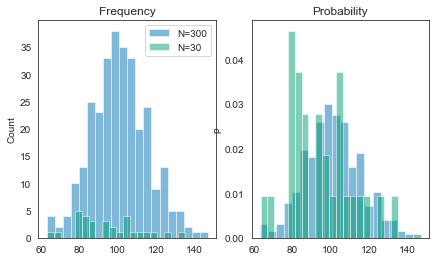

In [115]:
import numpy as np
print('Basic Histogram: Display IQ scores')
n1 = 300
n2 = 30
y1 = np.random.normal(100, 15, (n1, 1))
y2 = np.random.normal(100, 15, (n2, 1))
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(1, 2, 1) 
ax1.hist(y1, bins=20, alpha=.5)
ax1.hist(y2, bins=20, alpha=.5)
ax1.set_ylabel('Count')
ax1.set_title('Frequency')
#ax1.legend(['small N', 'large N'])
ax1.legend(['N={}'.format(n1), 'N={}'.format(n2)])

ax2 = fig.add_subplot(1, 2, 2) 
ax2.hist(y1, bins=20, density=True, alpha=.5)
ax2.hist(y2, bins=20, density=True, alpha=.5)
ax2.set_ylabel('p')
ax2.set_title('Probability')

GRISSPEC: Scatter plot with separate histograms per variable (=axis)


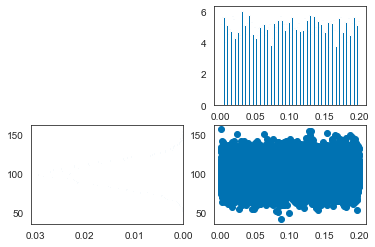

In [116]:
print('GRISSPEC: Scatter plot with separate histograms per variable (=axis)')
import matplotlib.gridspec as gridspec 
n = 10000; mu=100; increase = np.random.uniform(0, .2, n); IQ = np.random.normal(mu, 15, n)

fig = plt.figure()
gspec = gridspec.GridSpec(2,2)
ax1 = plt.subplot(gspec[0,1]) # bottom left 
ax2 = plt.subplot(gspec[1,0]) # top right 
ax3 = plt.subplot(gspec[1,1]) # bottom right

ax3.scatter(increase, IQ)
ax2.hist(IQ, orientation='horizontal', density=True, bins=100);
ax2.invert_xaxis()
ax1.hist(increase, density=True, bins=100);



__BOXPLOTS__

Different distributions


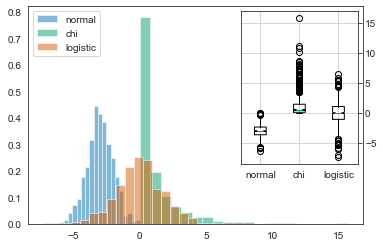

In [117]:
print('Different distributions')
n=1000
x1 = np.random.normal(-3,1,n)
x2 = np.random.chisquare(1,n)
x3 = np.random.logistic(0,1,n)
df = pd.DataFrame({'normal': x1, 'chi': x2, 'logistic': x3})

fig=plt.figure()
#plt.hist(df, bins=20)
plt.hist(df['normal'], bins=20, alpha=.5, density=True)
plt.hist(df['chi'], bins=20, alpha=.5, density=True)
plt.hist(df['logistic'], bins=20, alpha=.5, density=True)
plt.legend(df.columns,loc=2)

import mpl_toolkits.axes_grid1.inset_locator as mpl_il
ax2 = mpl_il.inset_axes(plt.gca(), width='35%', height='70%', loc=1)
ax2.boxplot(df,notch=True, labels=df.columns); #range covers 100% of data
ax2.yaxis.tick_right()
ax2.grid()

__HEATMAPS__

HEATMAPS remain a mistery to me. Below, two examples where a 2D matrix is displayed in heatmaps - but these do not seem to work. Example 3 is taken from the lecture - here, the data is not a 2D matrix, rather the arguments are the two 1D series that are supposed to be on the x-/y-axes. NOTE: I couldnt get the colorbar running, except for the SNS function where it appears to be a default
(100,)


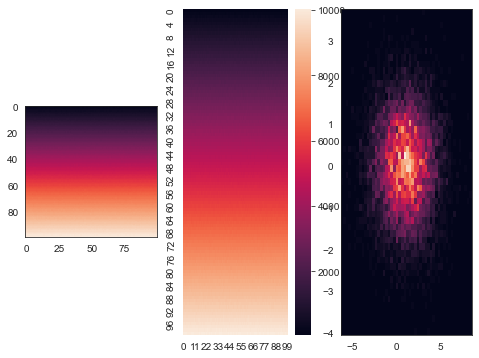

In [118]:
print('HEATMAPS remain a mistery to me. Below, two examples where a 2D matrix is displayed in heatmaps - but these do not seem to work. Example 3 is taken from the lecture - here, the data is not a 2D matrix, rather the arguments are the two 1D series that are supposed to be on the x-/y-axes. NOTE: I couldnt get the colorbar running, except for the SNS function where it appears to be a default')
def linearFX(x, a, b):
    return x*a + b

# create a linear series
y = linearFX(np.array(range(0,100)), 100, 100)
# create normally distributed data using the score in the linear series as the mean mu
allY = [np.random.normal(yx, 15, 100) for yx in y]

print(np.shape(y))
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(131)
ax1.imshow(allY, interpolation='nearest')

import seaborn as sns
ax2 = fig.add_subplot(132)
ax2 = sns.heatmap(allY)

#x = linearFX(np.array(range(0,200)), 1, -10);
# x = np.random.random(size=10000)
x = np.random.normal(1,2,10000)
y = np.random.normal(0,1, 10000);
ax3 = fig.add_subplot(133);
ax3.hist2d(x,y,bins=50);
#ax3.colorbar()

Contour plots are conceptually similar to heatmaps. Heres an example from the Andrew Ng lecture (multivariate Gaussian)
Multivariate Gaussian distribution as a contour plot


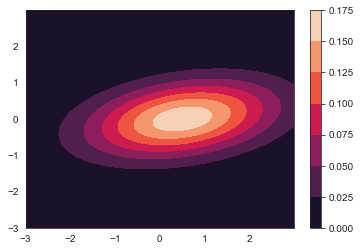

In [119]:
print('Contour plots are conceptually similar to heatmaps. Heres an example from the Andrew Ng lecture (multivariate Gaussian)')
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

print('Multivariate Gaussian distribution as a contour plot')
x,y = np.mgrid[-3:3:.01, -3:3:.01]
z = multivariate_normal([.5, 0], [[2.0, 0.3], [0.3, 0.5]])
pos = np.dstack((x,y))
fig = plt.figure()
plt.contourf(x,y,z.pdf(pos))
plt.colorbar()

__ANIMATIONS__

In [120]:
print('Animations require the animation.FuncAnimation FX which calls an update FX. The update FX modifies the fig (or parts of it). NOTE: To run an animation, change the backend to %matplotlib qt')

import matplotlib.animation as animation
%matplotlib qt

fig = plt.figure()
x = np.arange(0, 100)
y = x ** 2
plt.plot(x, y,color='gray')
plt.axis([0,100,0,10000])
redDot, = plt.plot([0], [0], 'ro')

def update(i):
    redDot.set_data(x[i], y[i]) # odd, but the function does not seem to be encapsulated. ie it can access x and y
    return redDot

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, update, frames=x, interval=10,repeat=True)
plt.show()

Animations require the animation.FuncAnimation FX which calls an update FX. The update FX modifies the fig (or parts of it). NOTE: To run an animation, change the backend to %matplotlib qt


In [121]:
print('Sampling from the normal distribution. The update FX in this animation does not return variables but redraws the entire plot')
%matplotlib qt

n = 500
s = 2
x = np.random.normal(0, s, n)

def update(i):
    plt.cla()
    plt.axis([-4, 4, 0, 100])
    bins = np.arange(-4,4,.5)
    plt.hist(x[:i], bins=bins)
    #plt.plot([np.mean(x[:i]), np.mean(x[:i])], [0, plt.gca().get_ylim()[1]], 'r-')
    plt.plot([np.mean(x[:i]), np.mean(x[:i])], [0, 80], 'r-')
    plt.annotate('{}'.format(round(np.mean(x[:i]),2)), [np.mean(x[:i])-.2,82])

    plt.plot([-np.std(x[:i]), np.std(x[:i])], [74, 74], 'r-')
    plt.annotate('{}'.format(round(np.std(x[:i]),2)), [.2,76])
    
    plt.gca().set_title('Sampling from norm dist with SD={}'.format(s))
    plt.gca().set_xlabel('Scores')
    plt.gca().set_ylabel('Count')
    plt.annotate('n={}'.format(i), [-3,90])

fig = plt.figure(figsize=(8,6))
myA = animation.FuncAnimation(fig, update, frames=range(0,len(x)), interval=1, repeat = True)
plt.show()

Sampling from the normal distribution. The update FX in this animation does not return variables but redraws the entire plot


__INTERACTIVITY__

In [122]:
print('Create an event listener that connects the figure (in which the event occurs) with a function that executes an action on click')
print('Example: Running this cell creates a figure - clicking on the screen prints out the pixel and x/y coordinates')
%matplotlib qt
fig = plt.figure()
plt.plot([-1, 1], [-1, 1])

def onclick(event):
    xd,yd = event.xdata,event.ydata 
    print('Click at pixel {},{} || axis coordinates: {}, {}'.format(event.x, event.y, np.round(xd,3), np.round(yd,3)))    
    plt.gca().set_title('Event at coordinates {} | {}'.format(np.round(xd,3), np.round(yd,3)))
    plt.draw()    
    
fig.canvas.mpl_connect('button_press_event', onclick)
#fig.canvas.mpl_disconnect(cid) # use later to disconnect event listener

Create an event listener that connects the figure (in which the event occurs) with a function that executes an action on click
Example: Running this cell creates a figure - clicking on the screen prints out the pixel and x/y coordinates


8

In [123]:
print('Picking a bar in a bar graph is somewhat awkward, as the event has no index. A hack would be to use the clicked rectangles x score to infer the index')
print('In this example, I am going to click on the 3 bars (for Germany, Italy and UK) from left to right ... \n')
%matplotlib qt
df = pd.DataFrame({'origin': ['Germany', 'Italy', 'UK'], 
                   'value': [83, 60, 67]})
fig = plt.figure();
plt.bar(range(1, len(df)+1), tick_label =df.origin, height=df.value, picker=5);

def onclick(event):
    print(event.artist)
    thisInd = round(event.artist.xy[0])-1
    thisLabel = df.iloc[thisInd]['origin']
    thisValue = df.iloc[thisInd]['value']    
    print('xy coordinates: ' + str(event.artist.xy) + ' inferred index: ' + str(thisInd) + ', label: ' + thisLabel + ', value: ' + str(thisValue))    
    thisStr = 'Population of {} = {} Mio'.format(df.iloc[thisInd]['origin'], df.iloc[thisInd]['value'])
    plt.gca().set_title(thisStr)
    plt.draw()    
    
fig.canvas.mpl_connect('pick_event', onclick);

Picking a bar in a bar graph is somewhat awkward, as the event has no index. A hack would be to use the clicked rectangles x score to infer the index
In this example, I am going to click on the 3 bars (for Germany, Italy and UK) from left to right ... 



In [124]:
print('Picking elements in a scatter / line plot is more straightforward as there is an index for the pick event')
print('In this example, I am going to click on the three dots from left to right (ie Italy, UK, Germany)')
print('Note: see comment for using a line rather than scatter plot')

%matplotlib qt
df = pd.DataFrame({'country': ['Germany', 'Italy', 'UK'], 
                   'pop': [83, 60, 67], 
                   'GDP': [3.806, 1.886, 2.708]})
fig = plt.figure()
plt.scatter(df['pop'], df['GDP'],200, picker=True, pickradius=20)
# for plot, use:
#plt.plot(df['pop'], df['GDP'], 'o', picker=True, pickradius=20)

def onclick(event):
    print(event.ind)
    ind = event.ind[0]
    thisStr = 'Country = {}, pop. = {} Mio, GDP = ${} bn'.format(df.iloc[ind]['country'], df.iloc[ind]['pop'], df.iloc[ind]['GDP'])
    plt.gca().set_title(thisStr)
    print(thisStr)
    plt.draw()    
    
fig.canvas.mpl_connect('pick_event', onclick)


Picking elements in a scatter / line plot is more straightforward as there is an index for the pick event
In this example, I am going to click on the three dots from left to right (ie Italy, UK, Germany)
Note: see comment for using a line rather than scatter plot


8

---------------------------------------------
See animations from the assignment in week 3: Left = contrasting green bar to the rest. Right = compare against ref score

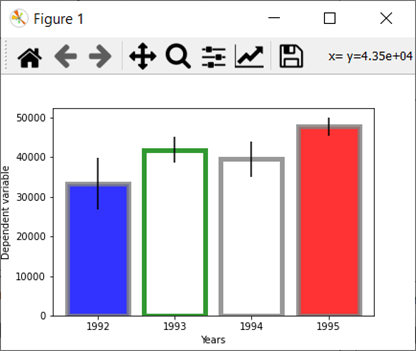
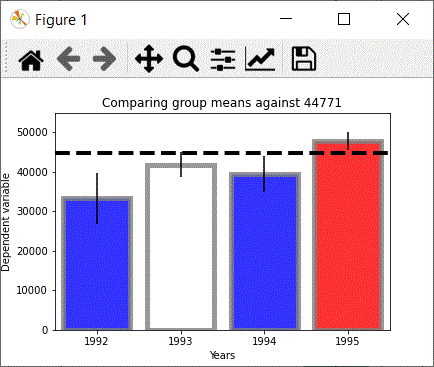

# WEEK 4: Even more advanced

__PANDAS builtin plots__

To change the COLOR-SCHEME: plt.syle.available
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
----------------------------------------------------------------------------------------------------

BASIC PLOTTING using pandas methods. Note that the plot type can be defined using the argument, or directly through the method
Here are examples of line, scatter, box and hist plots


Text(0.5, 1.0, 'basic boxplot')

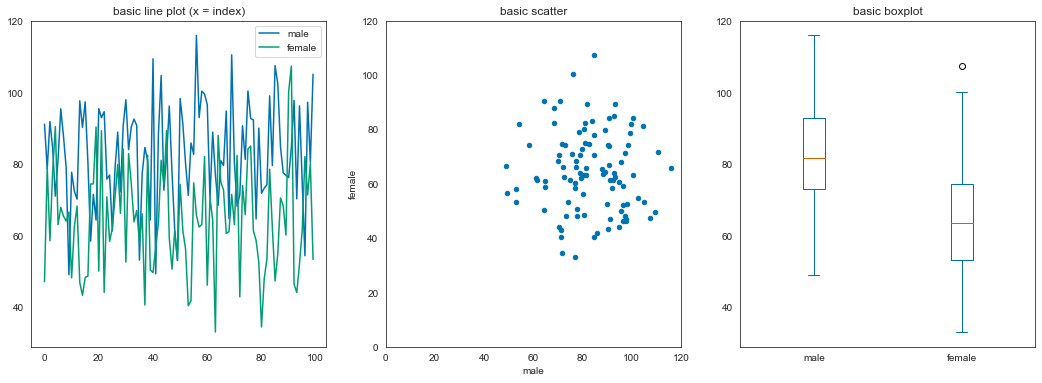

In [125]:
print('To change the COLOR-SCHEME: plt.syle.available')
print(plt.style.available)
plt.style.use('seaborn-colorblind')
print('-'*100)
%matplotlib inline

print('\nBASIC PLOTTING using pandas methods. Note that the plot type can be defined using the argument, or directly through the method')
print('Here are examples of line, scatter, box and hist plots')
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'male': np.random.normal(80, 15, 100), 'female': np.random.normal(65, 15, 100)})
df.describe()

fig, axes = plt.subplots(figsize = (18,6), nrows=1, ncols=3)
df.plot(ax=axes[0], title='basic line plot (x = index)')
df.plot(x='male',y='female', ax=axes[1], kind='scatter', title='basic scatter') # ALTERNATIVE: df.plot.scatter()
axes[1].set_xlim([0,120]);axes[1].set_ylim([0,120]); #axes[1].set_aspect('equal'); 
df.plot(ax=axes[2], kind='box'); axes[2].set_title('basic boxplot')
#ALTERNATIVE: df.boxplot(column = ['male','female'], ax=axes[2]); axes[2].set_title('basic boxplot')

__BASIC HISTOGRAMS__

This is a very basic histogram, grouped by a categorical var


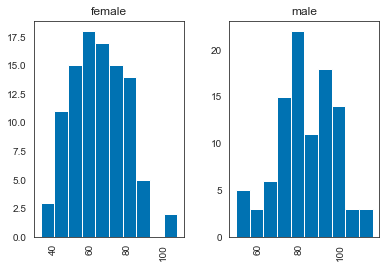

Plotting different groups in one plot: hist and probability density


Text(0.5, 1.0, 'Kernel Density Estimate (KDE)')

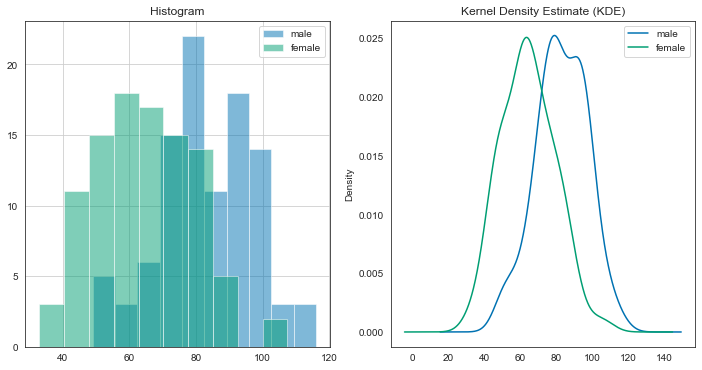

In [126]:
print('This is a very basic histogram, grouped by a categorical var')
# for the hist, let's re-arrange the data in the dataframe to a LONG format
dfX = pd.DataFrame({'gender': ['male'] * len(df['male']) + ['female'] * len(df['female']), 
                   'weight': np.concatenate((df['male'], df['female']),axis=0)})
dfX.hist(by = 'gender', bins = 10); plt.show()

print('Plotting different groups in one plot: hist and probability density')
fig, axes = plt.subplots(figsize = (12,6), nrows=1, ncols=2)
df['male'].hist(bins = 10, ax=axes[0], alpha=.5, label='male'); 
df['female'].hist(bins = 10, ax=axes[0], alpha=.5, label='female'); 
axes[0].legend(); axes[0].set_title('Histogram')
df.plot.kde(ax=axes[1]); axes[1].set_title('Kernel Density Estimate (KDE)')


__SCATTER on steroids (PANDAS PLOTTING tools)__

It is possible to display up to 4 variables in scatter plots by varying dot sizes and colors

This example uses the classical iris dataset: 2 species
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


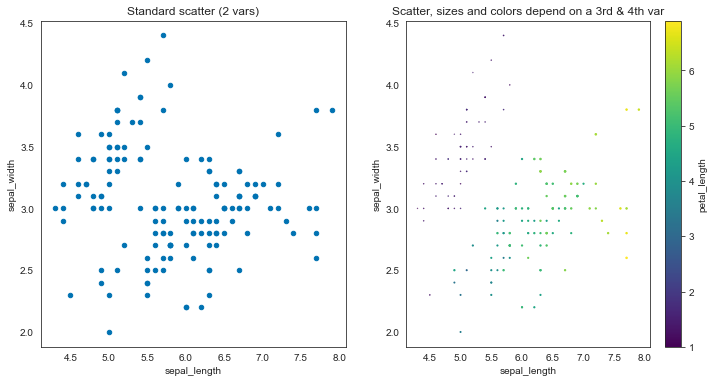

In [127]:
print('It is possible to display up to 4 variables in scatter plots by varying dot sizes and colors\n')
print('This example uses the classical iris dataset: 2 species')
iris = pd.read_csv(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/iris.csv')
print(iris.head())

fig, axes = plt.subplots(figsize = (12,6), nrows=1, ncols=2)
iris.plot.scatter(ax=axes[0], x='sepal_length',y='sepal_width', colormap='viridis', title='Standard scatter (2 vars)')
iris.plot.scatter(ax=axes[1], x='sepal_length',y='sepal_width', c='petal_length', s=iris['petal_width'], colormap='viridis', title='Scatter, sizes and colors depend on a 3rd & 4th var')
plt.show()

SCATTER_MATRIX: Pandas provides tools, eg for creating scatter plots for variable pairs


<Figure size 1296x576 with 0 Axes>

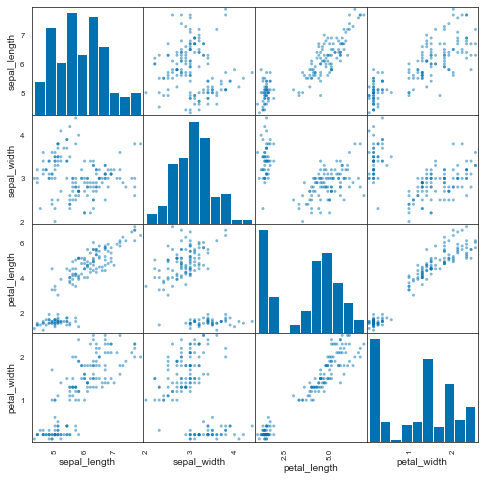

In [128]:
print('SCATTER_MATRIX: Pandas provides tools, eg for creating scatter plots for variable pairs')
fig = plt.figure(figsize=(18,8));
pd.plotting.scatter_matrix(iris, figsize=(8, 8));

__SEABORN__

Seaborn features advanced plotting methods. The following are variants of the standard histogram and work on a figure level

sns.DISPLOT - takes a DF as variable and the column to be shown on the x-axis. KIND defines the type of plot (e.g. hist, kde, ecdf. The size of the plot is not defined externally (using figsize in a plt.figure call) but internally per parameter HEIGHT

GROUPING: Data from different distributions can be distinguished per color (HUE) or position (COL)
RUG: Gives a better idea of the distribution by plotting scores
KDE allows for filled PDF plots


Text(0.5, 1.0, 'Cumulative prob density (ECDF)')

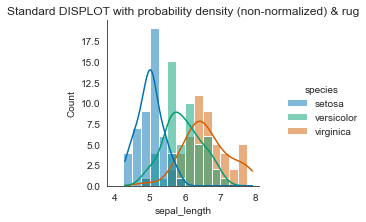

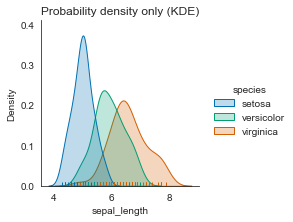

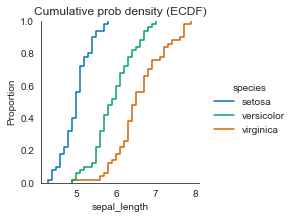

In [129]:
print('Seaborn features advanced plotting methods. The following are variants of the standard histogram and work on a figure level\n')
import seaborn as sns
sns.set_style('white')
#iris = pd.read_csv('assets/iris.csv')
specList =  set(iris.species.to_list())

print('sns.DISPLOT - takes a DF as variable and the column to be shown on the x-axis. KIND defines the type of plot (e.g. hist, kde, ecdf. The size of the plot is not defined externally (using figsize in a plt.figure call) but internally per parameter HEIGHT')
print('\nGROUPING: Data from different distributions can be distinguished per color (HUE) or position (COL)')
print('RUG: Gives a better idea of the distribution by plotting scores')
print('KDE allows for filled PDF plots')
sns.displot(data = iris, x='sepal_length', hue='species', kde=True, bins=np.arange(4,8,.25), kind='hist', height=3)
plt.title('Standard DISPLOT with probability density (non-normalized) & rug')
sns.displot(data = iris, x='sepal_length', hue='species', kind='kde', rug=True, height=3, fill=True)
plt.title('Probability density only (KDE)')
sns.displot(data = iris, x='sepal_length', hue='species', kind='ecdf', height=3)
plt.title('Cumulative prob density (ECDF)')

2D histograms: DISPLOT allows for plotting 2 vars against each other by passing the DF columns to the x=/y= arguments

The standard (KIND = hist) creates 2D histograms with discrete bins which appear as pixels


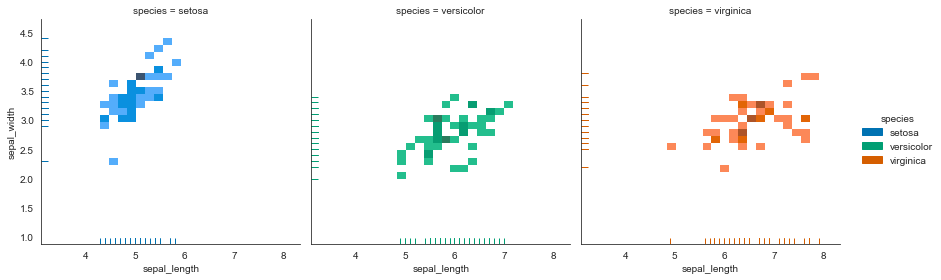


Alternatively, continuous kernel density estimates can be plotted (KIND = kde)


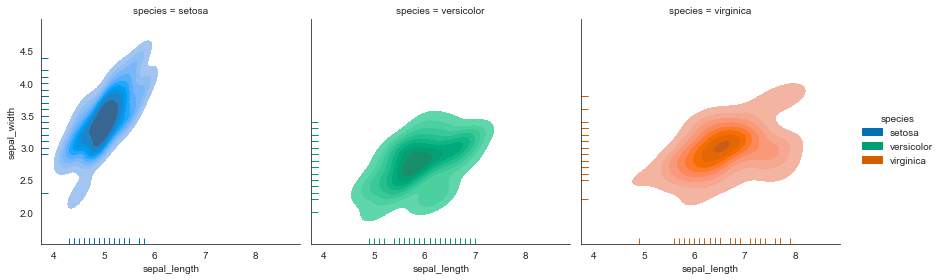


Of course it is possible to squeeze all three distributions into one graph. As it is obvious, the species SETOSA stands out


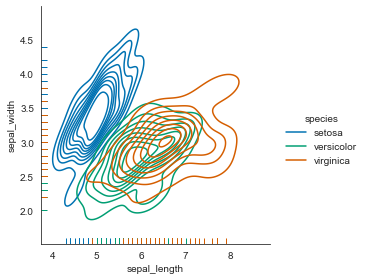

In [130]:
print('2D histograms: DISPLOT allows for plotting 2 vars against each other by passing the DF columns to the x=/y= arguments')
print('\nThe standard (KIND = hist) creates 2D histograms with discrete bins which appear as pixels')
sns.displot(data = iris, x='sepal_length', y='sepal_width', col='species', hue='species', kind='hist',bins=20, rug=True, height=4); plt.show()
print('\nAlternatively, continuous kernel density estimates can be plotted (KIND = kde)')
sns.displot(data = iris, x='sepal_length', y='sepal_width', col='species',hue='species', fill=True, kind='kde', rug=True, height=4); plt.show()

print('\nOf course it is possible to squeeze all three distributions into one graph. As it is obvious, the species SETOSA stands out')
sns.displot(data = iris, x='sepal_length', y='sepal_width', hue='species', kind='kde', rug=True, height=4);

HYBRID 2D plots combine a scatterplot with histograms (one per axis)


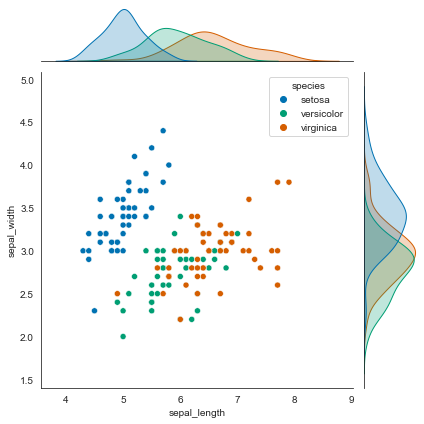

A new feature is the HEX plot - however, it does not support different hues yet, so the data is collapsed across species


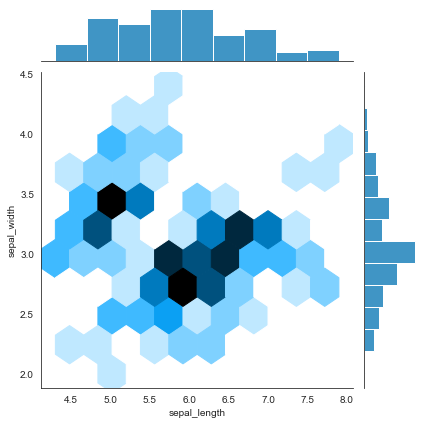

KDE is very elegant! Note the SPACE = 0 parameter which removes the gap between PDF and scatterplot axes


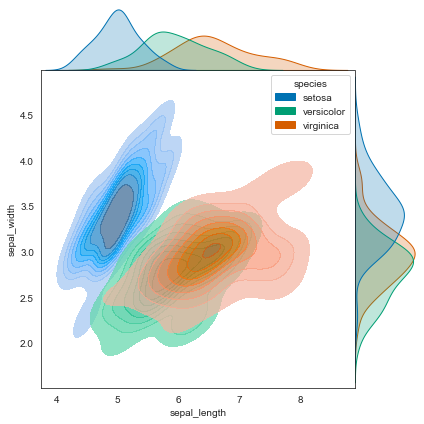

In [131]:
print('HYBRID 2D plots combine a scatterplot with histograms (one per axis)')
a = sns.jointplot(data=iris, x='sepal_length', y='sepal_width', hue='species');
#a.ax_joint.set_aspect('equal');
plt.show()

print('A new feature is the HEX plot - however, it does not support different hues yet, so the data is collapsed across species')
sns.jointplot(data=iris, x='sepal_length', y='sepal_width',  kind='hex');plt.show()

print('KDE is very elegant! Note the SPACE = 0 parameter which removes the gap between PDF and scatterplot axes')
sns.jointplot(data=iris, x='sepal_length', y='sepal_width',  kind='kde',hue='species', fill=True, alpha=.7, space=0);plt.show()


JOINTGRID increases flexibility - allows for customizing the joint / marginal plots separately
https://www.youtube.com/watch?v=t3G078DWXBM
For the simple version, use same types of plots for the marginal distributions


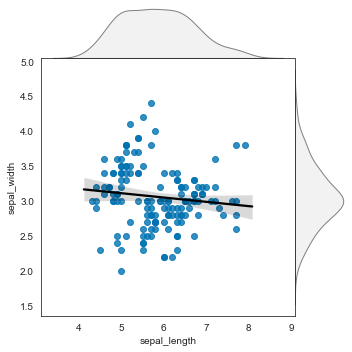

More advanced: different plots for the marginals


C:\Users\s01tk9\Anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


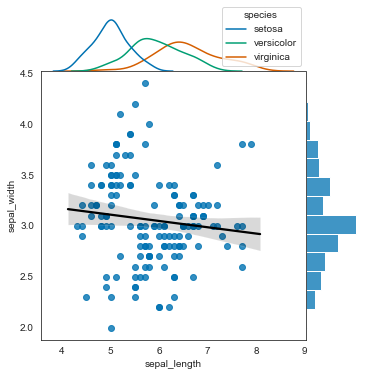

In [132]:
print('JOINTGRID increases flexibility - allows for customizing the joint / marginal plots separately')
print('https://www.youtube.com/watch?v=t3G078DWXBM')
print('For the simple version, use same types of plots for the marginal distributions')
g = sns.JointGrid(data=iris, x='sepal_length', y='sepal_width', space=0, height=5);
g.plot_joint(sns.regplot, line_kws={'color': 'black'}, truncate=False)
g.plot_marginals(sns.kdeplot, fill=True, alpha=.1, color='gray');
plt.show()
print('More advanced: different plots for the marginals')
g = sns.JointGrid(space=0, height=5);
x,y = iris['sepal_length'], iris['sepal_width'] 
sns.regplot(x=x,y=y, line_kws={'color': 'black'},  ax=g.ax_joint, truncate=False)
sns.kdeplot(x=x,ax=g.ax_marg_x, hue=iris['species'])
sns.histplot(y=y, ax=g.ax_marg_y);

The sns.PAIRPLOT is similar to pd.SCATTER_MATRIX, except more elegant. A definite plus is the option to plot PDFs into the diagonal


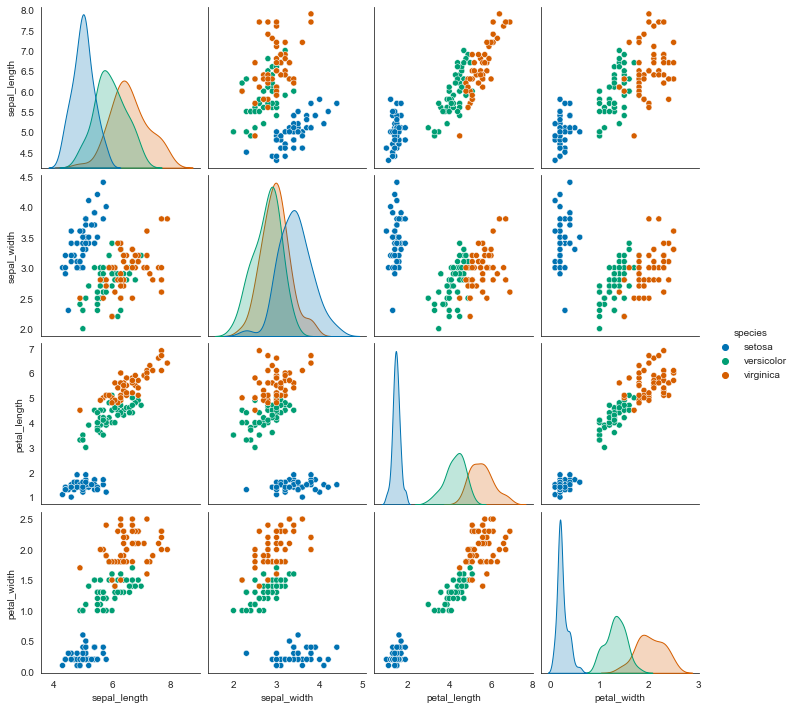

In [133]:
print('The sns.PAIRPLOT is similar to pd.SCATTER_MATRIX, except more elegant. A definite plus is the option to plot PDFs into the diagonal')
sns.pairplot(iris, hue='species', diag_kind='kde');


SWARMPLOT and VIOLIN are pimped variants of the BOXPLOT.
Note that the VIOLINs outline corresponds to a rotated KERNEL (KDE/PDF) of the distribution.

Note: in sns, it is easy to turn off particular spines using sns.DESPINE()


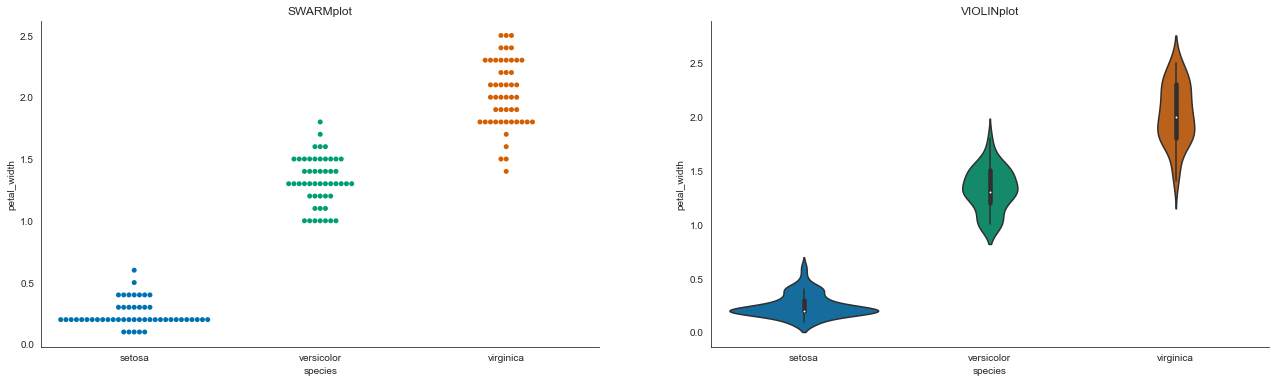

In [134]:
print('SWARMPLOT and VIOLIN are pimped variants of the BOXPLOT.\nNote that the VIOLINs outline corresponds to a rotated KERNEL (KDE/PDF) of the distribution.')

fig = plt.figure(figsize=(22,6));
plt.subplot(121);
sns.swarmplot(data=iris, x = 'species', y='petal_width'); plt.title('SWARMplot');
plt.subplot(122);
sns.violinplot(data=iris, x = 'species', y='petal_width'); plt.title('VIOLINplot');
print('\nNote: in sns, it is easy to turn off particular spines using sns.DESPINE()')
sns.despine(left=False, bottom=False, top=True, right=True)